## VGG-16 Model:
---
Developed by: Visual Graphics Group (VGG) at the University of Oxford
Published in: 2014
Primary Use Case: Image classification

---

### Key Features:
Simplicity: Uses a straightforward architecture with small 3x3 filters.

Deep Architecture: Includes 16 layers in total, which allows it to learn complex features.

Uniform Design: Consistent filter size throughout the network, making it easy to implement.

High Performance: Achieved state-of-the-art results on the ImageNet dataset at the time of its release.

---
### Applications:
Image Classification: Used for classifying images into different categories.

Feature Extraction: Pre-trained VGG16 models are often used to extract features from images for transfer learning in other tasks.

----
### Impact:
Influence: VGG16 has influenced the design of many subsequent deep learning models with its simple yet effective architecture.

Benchmark: Often used as a benchmark for comparing the performance of new models and techniques in the field of computer vision.

---
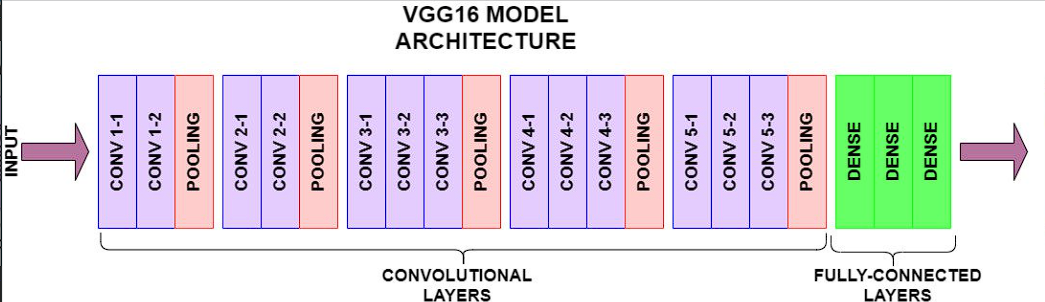
---

In [7]:
import torch
import torch.nn as nn

class VGG16(nn.Module):
    def __init__(self, num_classes=1000):
        super().__init__()

        # Convolutional Layer's
        self.features = nn.Sequential(
            
            nn.Conv2d(3, 64, kernel_size=3, padding=1),         # <------  1st Layer
            nn.ReLU(inplace=True),
            
            nn.Conv2d(64, 64, kernel_size=3, padding=1),       # <------  2nd Layer
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),      # <------  3rd Layer
            nn.ReLU(inplace=True),
            
            nn.Conv2d(128, 128, kernel_size=3, padding=1),     # <------  4th Layer
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),     # <------  5th Layer
            nn.ReLU(inplace=True),
            
            nn.Conv2d(256, 256, kernel_size=3, padding=1),     # <------  6th Layer
            nn.ReLU(inplace=True),
            
            nn.Conv2d(256, 256, kernel_size=3, padding=1),     # <------  7th Layer
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1),    # <------  8th Layer
            nn.ReLU(inplace=True),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1),    # <------  9th Layer
            nn.ReLU(inplace=True),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1),    # <------  10th Layer
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1),    # <------  11th Layer
            nn.ReLU(inplace=True),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1),    # <------  12th Layer
            nn.ReLU(inplace=True),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1),    # <------  13th Layer
            nn.ReLU(inplace=True),     
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # ANN for Classification
        self.classifier = nn.Sequential(
            
            nn.Linear(512 * 7 * 7, 4096),       # <------ 14th Layer
            nn.ReLU(inplace=True),
            nn.Dropout(),
            
            nn.Linear(4096, 4096),             # <------  15th Layer
            nn.ReLU(inplace=True),
            nn.Dropout(),
            
            nn.Linear(4096, num_classes)     # <------  16th layer (Output)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


In [3]:
# Create an instance of the VGG16 model
model = VGG16(num_classes=1000)


In [5]:
model

VGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation